<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#简单练习" data-toc-modified-id="简单练习-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>简单练习</a></span></li><li><span><a href="#单变量线性回归" data-toc-modified-id="单变量线性回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>单变量线性回归</a></span><ul class="toc-item"><li><span><a href="#数据可视化（Plotting-the-Data）" data-toc-modified-id="数据可视化（Plotting-the-Data）-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>数据可视化（Plotting the Data）</a></span></li><li><span><a href="#代价函数" data-toc-modified-id="代价函数-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>代价函数</a></span></li><li><span><a href="#变量初始化" data-toc-modified-id="变量初始化-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>变量初始化</a></span></li><li><span><a href="#计算代价J(θ)" data-toc-modified-id="计算代价J(θ)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>计算代价J(θ)</a></span></li><li><span><a href="#梯度下降（Gredient-Descent）" data-toc-modified-id="梯度下降（Gredient-Descent）-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>梯度下降（Gredient Descent）</a></span></li><li><span><a href="#结果可视化" data-toc-modified-id="结果可视化-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>结果可视化</a></span><ul class="toc-item"><li><span><a href="#绘制拟合图像" data-toc-modified-id="绘制拟合图像-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>绘制拟合图像</a></span></li><li><span><a href="#绘制cost走势" data-toc-modified-id="绘制cost走势-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>绘制cost走势</a></span></li></ul></li></ul></li><li><span><a href="#多变量线性回归" data-toc-modified-id="多变量线性回归-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>多变量线性回归</a></span><ul class="toc-item"><li><span><a href="#读取文件" data-toc-modified-id="读取文件-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>读取文件</a></span></li><li><span><a href="#特征归一化" data-toc-modified-id="特征归一化-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>特征归一化</a></span></li><li><span><a href="#变量初始化" data-toc-modified-id="变量初始化-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>变量初始化</a></span></li><li><span><a href="#代价函数" data-toc-modified-id="代价函数-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>代价函数</a></span></li><li><span><a href="#梯度下降" data-toc-modified-id="梯度下降-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>梯度下降</a></span></li><li><span><a href="#结果可视化" data-toc-modified-id="结果可视化-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>结果可视化</a></span><ul class="toc-item"><li><span><a href="#绘制cost走势" data-toc-modified-id="绘制cost走势-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>绘制cost走势</a></span></li><li><span><a href="#绘制拟合图像" data-toc-modified-id="绘制拟合图像-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>绘制拟合图像</a></span></li></ul></li></ul></li><li><span><a href="#正规方程" data-toc-modified-id="正规方程-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>正规方程</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 简单练习
输出一个5*5的单位矩阵

In [2]:
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 单变量线性回归
整个2的部分需要根据城市人口数量，预测开小吃店的利润  
数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。

## 数据可视化（Plotting the Data）

In [3]:
# 读取文件
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
# 最后一列
cols = data.shape[1]
y = data.iloc[:, cols-1:cols]
y

,profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


In [6]:
y1 = data.iloc[:, -1:]
y1

,profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


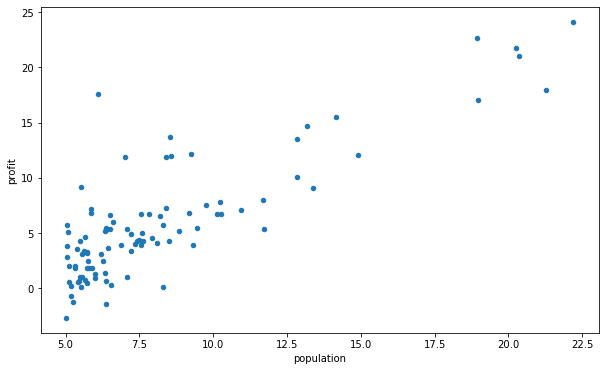

In [7]:
# 绘图
data.plot(kind='scatter', x='population', y='profit', figsize=(10, 6))
# plt.xlabel('Population of City in 10,000s')
# plt.ylabel('Profit in $10,000s')
plt.show()

## 代价函数
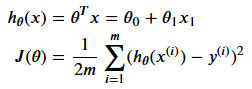

In [8]:
# 计算J(Ѳ)
def computeCost(X, y, theta):
    h = X * theta.T
    inner = np.power((h - y), 2)
    return np.sum(inner, axis=0) / (2 * len(X))

## 变量初始化

In [9]:
# 加入一列，全为1
data.insert(0, 'Ones', 1)
data.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [10]:
# 变量初始化，X, y
X = data.iloc[:, :-1]  # data中除了最后一列外的所有列
y = data.iloc[:, -1:]  # data最后一列

In [11]:
X.head()

,Ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [13]:
# X, y转化为矩阵并初始化theta
X = np.matrix(X.values)
y = np.matrix(y.values)

theta = np.matrix(np.array([0, 0]))

In [14]:
# 看下维度
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

## 计算代价J(θ)

In [15]:
computeCost(X, y, theta)

matrix([[32.07273388]])

## 梯度下降（Gredient Descent）
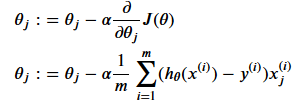

In [16]:
# 梯度下降算法
def gradientDescent(X, y, theta, alpha, iters):
    thetaArr = np.zeros((iters, 2))
    cost = np.zeros(iters)
    m = len(X)  # 样本数量
    for i in range(iters):
        #cost[i] = computeCost(X, y, theta)
        theta = theta - (alpha / m) * (X * theta.T - y).T * X  # 向量化，一步到位
        thetaArr[i] = theta
        cost[i] = computeCost(X, y, theta) # 放在更新theta后面，为了cost走势图更好看
    return theta, cost, thetaArr

In [17]:
alpha = 0.01
iters = 1500

In [18]:
final_theta, cost, thetaArr = gradientDescent(X, y, theta, alpha, iters)

In [19]:
final_theta

matrix([[-3.63029144,  1.16636235]])

In [20]:
cost

array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
       4.48338826])

In [21]:
thetaArr

array([[ 0.05839135,  0.6532885 ],
       [ 0.06289175,  0.77000978],
       [ 0.05782293,  0.79134812],
       ...,
       [-3.6293317 ,  1.16626593],
       [-3.62981201,  1.16631419],
       [-3.63029144,  1.16636235]])

In [22]:
thetaArr[:, 0]

array([ 0.05839135,  0.06289175,  0.05782293, ..., -3.6293317 ,
       -3.62981201, -3.63029144])

In [23]:
thetaArr = np.matrix(thetaArr)
thetaArr

matrix([[ 0.05839135,  0.6532885 ],
        [ 0.06289175,  0.77000978],
        [ 0.05782293,  0.79134812],
        ...,
        [-3.6293317 ,  1.16626593],
        [-3.62981201,  1.16631419],
        [-3.63029144,  1.16636235]])

In [24]:
thetaArr.shape, X.shape, y.shape

((1500, 2), (97, 2), (97, 1))

In [25]:
cost1 = computeCost(X, y, thetaArr)
cost1

matrix([[6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
         4.48338826]])

In [26]:
cost1.shape

(1, 1500)

In [27]:
# 预测
predict1 = [1, 3.5] * final_theta.T
print('predict1:', predict1)
predict2 = [1, 7] * final_theta.T
print('predict2:', predict2)

predict1: [[0.45197679]]
predict2: [[4.53424501]]


## 结果可视化

### 绘制拟合图像

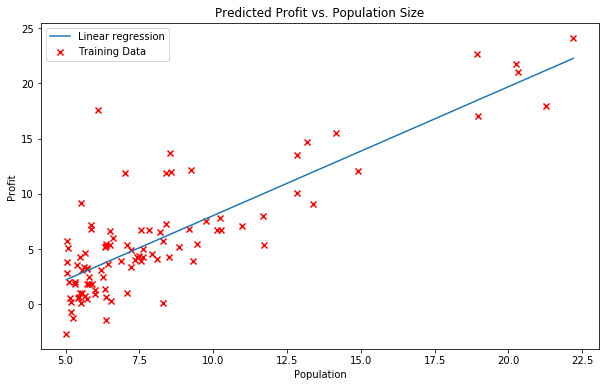

In [28]:
x = np.linspace(data.population.min(), data.population.max(), 100)
f = final_theta[0, 0] + x * final_theta[0, 1]

plt.figure(figsize=(10, 6)) # 设置图像尺寸
plt.scatter(data.population, data.profit, c='r', marker='x', label='Training Data', )
plt.plot(x, f, label='Linear regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Predicted Profit vs. Population Size')
plt.legend(loc=2)
plt.show()

### 绘制cost走势

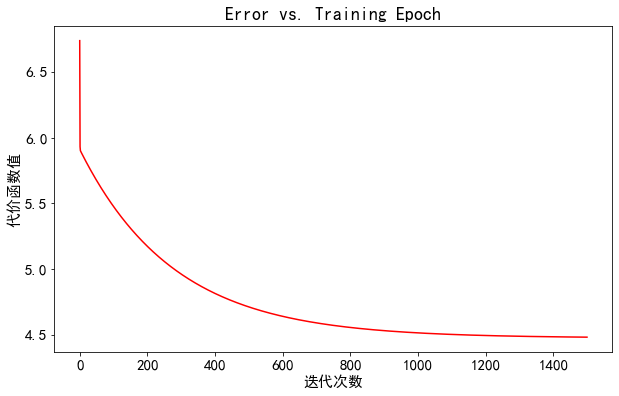

In [29]:
plt.rcParams['font.family'] = 'SimHei' # 'SimHei'是黑体
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(10, 6))
plt.plot(np.arange(iters), cost, 'r')
plt.xlabel('迭代次数')
plt.ylabel('代价函数值')
plt.title('Error vs. Training Epoch')
plt.show()

# 多变量线性回归
ex1data2.txt里的数据，第一列是房屋大小，第二列是卧室数量，第三列是房屋售价  
根据已有数据，建立模型，预测房屋的售价

## 读取文件

In [30]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['size', 'bedrooms', 'price'])
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [31]:
data2.describe()

,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [32]:
data2.mean()

size          2000.680851
bedrooms         3.170213
price       340412.659574
dtype: float64

In [33]:
(data2 - data2.mean()) / data2.std()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


## 特征归一化
观察数据发现，size变量是bedrooms变量的1000倍大小,统一量级会让梯度下降收敛的更快  
做法就是，将每类特征减去他的平均值后除以标准差

In [34]:
def featureNormalize(dataSet):
    meanVal = dataSet.mean()
    stdVal = dataSet.std()
    normDataSet = (dataSet - meanVal) / stdVal
    return normDataSet, meanVal, stdVal

In [35]:
normData2, meanVal, stdVal  = featureNormalize(data2)
normData2.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## 变量初始化

In [36]:
# 加一列全1
normData2.insert(0, 'Ones', 1)

#初始化X, y
X2 = normData2.iloc[:, :-1]
y2 = normData2.iloc[:, -1:]

# 转化为matrix格式，初始化theta
X2 = np.matrix(X2)
y2 = np.matrix(y2)
theta2 = np.matrix(np.array([0, 0, 0]))

In [37]:
normData2.head()

,Ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


## 代价函数

In [38]:
def computeCost(X, y, theta):
    h = X * theta.T
    inner = np.power((h - y), 2)
    return np.sum(inner) / (2*len(X))

## 梯度下降

In [39]:
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    m = len(X)  # 样本数量
    for i in range(iters):
        theta = theta - (alpha / m) * (X * theta.T - y).T * X  # 向量化，一步到位
        cost[i] = computeCost(X, y, theta) # 放在更新theta后面，为了cost走势图更好看
    return theta, cost

In [40]:
alpha = 0.01
iters = 600

In [41]:
final_theta2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

In [42]:
final_theta2

matrix([[-1.10913733e-16,  8.49528962e-01, -1.80232274e-02]])

In [43]:
final_theta2[0,0]

-1.1091373335275684e-16

In [44]:
computeCost(X2, y2, final_theta2)

0.13121998900980153

## 结果可视化

### 绘制cost走势

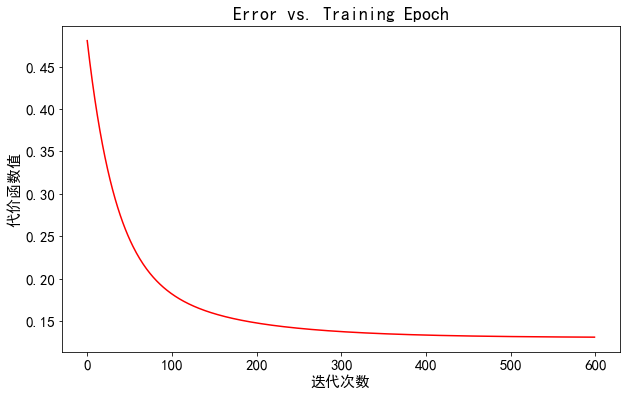

In [45]:
plt.rcParams['font.family'] = 'SimHei' # 'SimHei'是黑体
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(10, 6))
plt.plot(np.arange(iters), cost2, 'r')
plt.xlabel('迭代次数')
plt.ylabel('代价函数值')
plt.title('Error vs. Training Epoch')
plt.show()

### 绘制拟合图像

In [46]:
data2_ = data2.values
minVal = data2.min()
maxVal = data2.max()

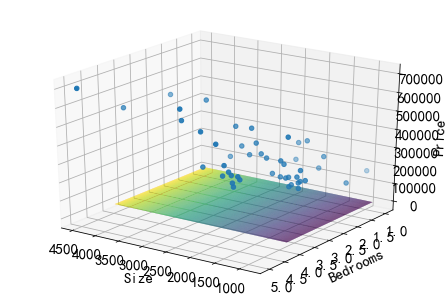

In [47]:
# 绘制拟合图像
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X_ = np.arange(minVal[0], maxVal[0], 1)
Y_ = np.arange(minVal[1], maxVal[1], 1)
X_, Y_ = np.meshgrid(X_, Y_)
Z_ = final_theta2[0,0] + final_theta2[0,1] * X_ + final_theta2[0, 2] * Y_  # 这里是错误的， 系数应该要转化到归一化前的模式
 
fig = plt.figure()
ax = Axes3D(fig)
# 手动设置角度
ax.view_init(elev=25, azim=125)

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

ax.plot_surface(X_, Y_, Z_, rstride=1, cstride=1, cmap=cm.viridis)

ax.scatter(data2_[:, 0], data2_[:, 1], data2_[:, 2])

plt.show()

# 正规方程
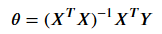
  
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：   
假设我们的训练集特征矩阵为 X（包含了）并且我们的训练集结果为向量 y，则利用正规方程解出向量 。  
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵，则： 
  
梯度下降与正规方程的比较：  

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型  

正规方程：不需要选择学习率α，一次计算得出，需要计算，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为，通常来说当小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [48]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y  # X.T@X 等价于 X.T.dot(X)
    return theta

In [49]:
final_theta_ = normalEqn(X, y) #这里用的是data1的数据
final_theta_

matrix([[-3.89578088],
        [ 1.19303364]])

In [50]:
# 梯度下降得到的结果是 matrix([[-3.63029144,  1.16636235]])